In [149]:
from kdtree import *
import matplotlib.pyplot as plt
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import heapq
from sklearn.datasets import make_blobs
import math
import copy
import random
import numpy as np

In [150]:
def euclidean_distance(coord1, coord2):
    dis = (math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2))
    return dis

In [151]:
X, Y = make_blobs(n_samples=1500, centers=9, random_state=42)
points = [(x,y) for x,y in X]

In [152]:
cordmap = {point : i for i , point in enumerate(points)}

In [153]:
tree = KDTree()
tree.root = tree.build(points)


In [154]:
def count_clusters(graph):
    return len(list(nx.connected_components(graph)))

In [155]:
def disk(k):
    x0 = 0  # location parameter
    gamma = 1/(len(points))**0.3  # scale parameter

    random = (k + abs(int(gamma * np.random.standard_cauchy())))% len(points)
    return random

In [156]:
def dcran(points):
    G = nx.Graph()

    for index, coord in enumerate(points):
        G.add_node(index, pos=coord)

    k = 2
    connected_components = 1
    while True :
        # maxdis = min(len(cordmap) - 1, 2**k)
        for pointi  , i in cordmap.items():
            diskv = disk(k)
            pointj = ith_nearest_neighbor(tree, pointi, diskv)
            dis = euclidean_distance(pointi , pointj)
            G.add_edge(i , cordmap[pointj] , weight = dis)
            
 
        print(k ,ccount:= count_clusters(G)) 
        k += 1
        if  ccount == 1 :
            break
    return G
        
        

In [157]:
kc = dcran(points)

2 417
3 56
4 11
5 6
6 5
7 2
8 2
9 2
10 2
11 2
12 2
13 2
14 2
15 2
16 1


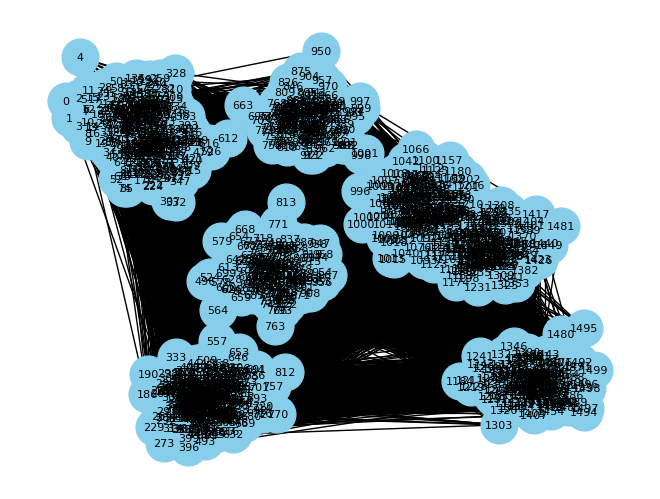

In [158]:
pos = positions = nx.get_node_attributes(G := kc, 'pos')
nx.draw(kc, positions,with_labels=True, node_color='skyblue', font_size=8, node_size=700)
edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=10)

plt.show()

In [159]:
cordmap

{(-6.571825422259211, -8.590277985932572): 0,
 (-7.14948668849297, -7.712954406085099): 1,
 (-3.282022837590322, 8.777467521458313): 2,
 (5.81840840945187, -5.23070368116872): 3,
 (-6.1030583925244315, -6.870751659124062): 4,
 (-8.436256364675174, -6.274099641930307): 5,
 (-8.131166615341714, -5.436344989202687): 6,
 (-5.822962698686636, -0.36525637813474465): 7,
 (6.091022444023143, 2.932440510025939): 8,
 (-6.899302118910286, -8.03926776052427): 9,
 (-8.18600487822259, 5.747130758514453): 10,
 (7.930496611012204, -5.195526725709352): 11,
 (3.3120529889469212, 4.834632907190867): 12,
 (-2.4416694183648264, 7.589537941984865): 13,
 (-9.592292345502687, 7.042847838631929): 14,
 (2.6017543010502475, 0.9650833730233279): 15,
 (-7.855795114598859, 11.629497189432518): 16,
 (2.321053143229862, 3.4096605058257246): 17,
 (-8.713103253988104, 6.89411737437345): 18,
 (1.9221461583842228, 3.957777805743943): 19,
 (5.5094847563337614, 3.328807542745683): 20,
 (-6.295699005825306, -7.2394016840630

In [160]:
G = kc
num_nodes = G.number_of_nodes()
nedge = num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
total_weight = sum(data['weight'] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")


Total number of nodes: 1500
Total number of edges: 13766
Total sum of edge weights: 7099.339939773808


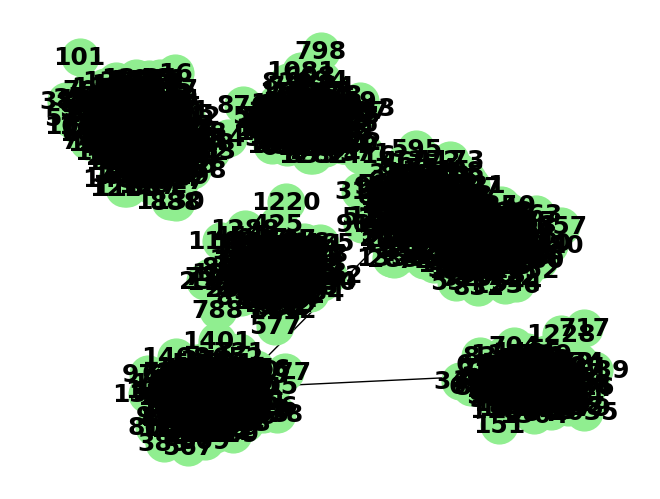

Edges in the MST:
[(0, 103, {'weight': 0.10073693348992827}), (0, 206, {'weight': 0.22090801600207602}), (0, 869, {'weight': 0.34615091744537574}), (1, 1492, {'weight': 0.0991273139031879}), (2, 191, {'weight': 0.08587839321241876}), (2, 668, {'weight': 0.12366070005977828}), (3, 214, {'weight': 0.1354709794448102}), (3, 669, {'weight': 0.13559045296643665}), (3, 1341, {'weight': 0.1921067192639331}), (4, 1277, {'weight': 0.1665783924965106}), (4, 1108, {'weight': 0.17292185103328667}), (5, 1305, {'weight': 0.15679497710768794}), (5, 1333, {'weight': 0.5656175012041593}), (6, 1351, {'weight': 0.29656601976951313}), (6, 605, {'weight': 0.31236841436527596}), (7, 230, {'weight': 0.21376681675722783}), (7, 1157, {'weight': 0.32888783481378064}), (8, 184, {'weight': 0.24843842652464818}), (9, 307, {'weight': 0.01609196336481762}), (10, 484, {'weight': 0.26605896624177244}), (10, 1256, {'weight': 0.4190385416449049}), (11, 1144, {'weight': 0.28606014579840655}), (11, 443, {'weight': 0.39165

In [161]:
mst = nx.minimum_spanning_tree(G, algorithm='kruskal', weight='weight')

# Draw the MST
pos = {i: coord for coord , i in cordmap.items()}
nx.draw(mst, pos, with_labels=True, font_weight='bold', node_color='lightgreen', font_size=18, node_size=700)
plt.show()

# Print the edges in the MST along with their weights
print("Edges in the MST:", list(mst.edges(data=True)) , sep='\n')

In [162]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
foundw = total_weight = sum(data['weight'] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")

Total number of nodes: 1500
Total number of edges: 1499
Total sum of edge weights: 321.6843014462198


In [163]:
G = nx.Graph()
cordinates = points
# Add nodes and edges
for pointi  , i in cordmap.items():
    G.add_node(i, pos=pointi)
    for pointj , j in cordmap.items():
        if i != j:
            dis = euclidean_distance(pointi , pointj)
            G.add_edge(i , j , weight = dis)

# # Generate node positions
# pos = {i: point for point  , i in cordmap.items()}

# # Draw the graph
# nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='lightblue', font_size=18, node_size=700)

# # Get and round edge labels
# edge_labels = nx.get_edge_attributes(G, 'weight')

# # Draw edge labels
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=10)

# plt.show()

In [164]:
mst = nx.minimum_spanning_tree(G, algorithm='kruskal', weight='weight')

# # Draw the MST
# pos = {i: coord for coord , i in cordmap.items()}
# nx.draw(mst, pos, with_labels=True, font_weight='bold', node_color='lightgreen', font_size=18, node_size=700)
# plt.show()

# # Print the edges in the MST along with their weights
# print("Edges in the MST:", list(mst.edges(data=True)) , sep='\n')

In [165]:
G = mst
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Calculate the sum of all edge weights
realw = total_weight = sum(data['weight'] for u, v, data in G.edges(data=True))

print(f"Total number of nodes: {num_nodes}")
print(f"Total number of edges: {num_edges}")
print(f"Total sum of edge weights: {total_weight}")

Total number of nodes: 1500
Total number of edges: 1499
Total sum of edge weights: 303.94313819668747


In [166]:
print(realw , foundw ,nedge ,  ((foundw - realw)/realw) * 100)

303.94313819668747 321.6843014462198 13766 5.837000747834518
